In [1]:
# """
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline
# """

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [2]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [3]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


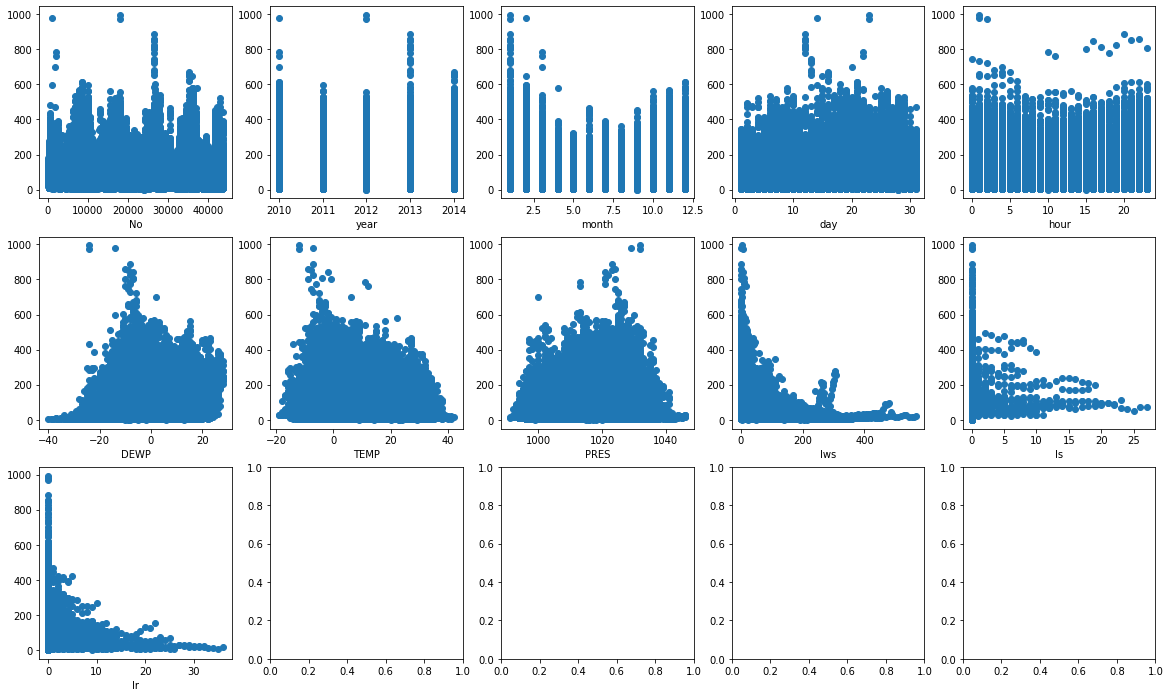

In [4]:
import matplotlib.pyplot as plt
from IPython.display import Image


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

x_vars = [
    'No', 'year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is',
    'Ir'
]

_, subplot_arr = plt.subplots(3, 5, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
    x_idx = idx // 5
    y_idx = idx % 5
    subplot_arr[x_idx, y_idx].scatter(df[x_var], df['pm2.5'])
    subplot_arr[x_idx, y_idx].set_xlabel(x_var)

plt.show()

In [5]:
X_drop = X[['DEWP', 'TEMP', 'PRES', 'month', 'day', 'hour']]

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X_drop)


X_train, X_test, Y_train, Y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=0)

In [6]:
regr = LinearRegression()

# Create quadratic features

Degree = 5
quadratic = PolynomialFeatures(degree=Degree)
X_quad_train = quadratic.fit_transform(X_train)
X_quad_test = quadratic.transform(X_test)
quad_regr = LinearRegression()
quad_regr.fit(X_quad_train, Y_train)
quadratic_r2_train = r2_score(Y_train, quad_regr.predict(X_quad_train))
quadratic_r2_test = r2_score(Y_test, quad_regr.predict(X_quad_test))
y_train_pred = quad_regr.predict(X_quad_train)
y_test_pred = quad_regr.predict(X_quad_test)

print('Degree: %d' %Degree)
print('train R2: %.3f' %quadratic_r2_train)
print('test R2: %.3f' %quadratic_r2_test)

Degree: 5
train R2: 0.909
test R2: 0.760


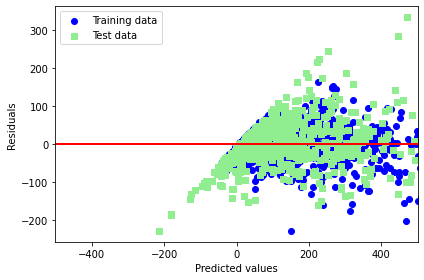

In [7]:
plt.scatter(
    y_train_pred,
    y_train_pred - Y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - Y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-500, xmax=500, lw=2, color='red')
plt.xlim([-500, 500])
plt.tight_layout()
plt.show()

In [8]:
n_estimators = 1000

tree_3 = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
tree_3.fit(X_train, Y_train)
linear_r2_train = r2_score(Y_train, tree_3.predict(X_train))
linear_r2_test = r2_score(Y_test, tree_3.predict(X_test))

y_train_pred = tree_3.predict(X_train)
y_test_pred = tree_3.predict(X_test)
print('n_estimators: %d' %n_estimators)
print('train R2: %.3f' %linear_r2_train)
print('test R2: %.3f' %linear_r2_test)


n_estimators: 1000
train R2: 0.987
test R2: 0.911


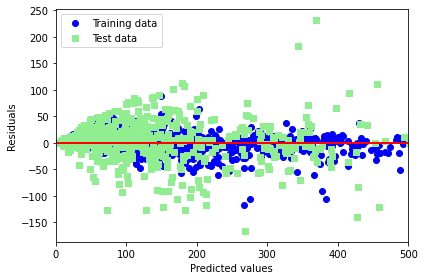

In [9]:
plt.scatter(
    y_train_pred,
    y_train_pred - Y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - Y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-500, xmax=500, lw=2, color='red')
plt.xlim([0, 500])
plt.tight_layout()
plt.show()